# Vec2GC Embedding

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from embeddings import create_sentence_embeddings
# from vec2gc_ver2 import HierarchicalClustering
# from vec2gc_ver3 import HierarchicalStreamingClustering
from vec2gc_ver4 import HierarchicalSequentialClustering
import numpy as np
from datasets import load_dataset
import datasets
import pandas as pd


In [3]:
def clean_dataset(dataset, col_name, size=0):
    dataset_df = pd.DataFrame(dataset)
    print(dataset_df.shape)
    dataset_df.dropna(inplace=True)
    dataset_df[col_name] = (dataset_df[col_name] 
                        .str.replace(r'\n+', ' ', regex=True)
                        .str.replace(r'\s+', ' ', regex=True)
                     )
    dataset_df.drop(dataset_df[dataset_df[col_name]==' '].index, inplace=True)
    dataset_df.drop(dataset_df[dataset_df[col_name]==''].index, inplace=True)
    dataset_df.drop_duplicates(inplace=True)
    print(dataset_df.shape)
    if size != 0:
        cleaned_dataset = datasets.Dataset.from_pandas(dataset_df.sample(size))
    else:
        cleaned_dataset = datasets.Dataset.from_pandas(dataset_df)
    return cleaned_dataset


In [4]:
# dataset_name = 'setfit/bbc-news'
# dataset_name = 'fancyzhx/ag_news'
dataset_name = 'setfit/20_newsgroups'
dataset_name, col_name = 'fancyzhx/dbpedia_14', 'content'
dataset = load_dataset(dataset_name, split='train')
cleaned_dataset = clean_dataset(dataset, col_name, 0)
print(len(cleaned_dataset))

(560000, 3)
(560000, 3)
560000


In [ ]:
print("Creating embeddings...")
embeddings = create_sentence_embeddings(
    dataset=cleaned_dataset,
    model_name='sentence-transformers/all-mpnet-base-v2',
    device='mps',
    batch_size=128
)

In [6]:
embeddings.shape

torch.Size([10984, 768])

In [7]:
clusterer = HierarchicalSequentialClustering(
    similarity_threshold=0.4,
    min_cluster_size=20,
    min_modularity=0.3,
    min_graph_size=10,
)


In [8]:
clusters = clusterer.fit_predict(embeddings.cpu().numpy())

Step 1: Processing 10984 items with 768-dimensional embeddings
  Using SEQUENTIAL SUBGRAPH PROCESSING (memory-efficient, batch_size=1000)
  Memory optimization: Only one subgraph in memory at a time per recursion level
Step 2: Creating NetworKit graph from embeddings (batched streaming mode)...
Step 2.1: Using single-threaded streaming
Step 2.1: Normalizing embeddings...
Step 2.1: Done normalizing embeddings
Step 2.2: Done initializing graph
Step 2.3: Computing similarities and building graph (batched streaming mode, batch_size=1000)...
  Processed 1098/10984 nodes, 48612 edges added so far...
  Processed 2196/10984 nodes, 92238 edges added so far...
  Processed 3294/10984 nodes, 130224 edges added so far...
  Processed 4392/10984 nodes, 163424 edges added so far...
  Processed 5490/10984 nodes, 192126 edges added so far...
  Processed 6588/10984 nodes, 216172 edges added so far...
  Processed 7686/10984 nodes, 234667 edges added so far...
  Processed 8784/10984 nodes, 247746 edges add

In [9]:
print(clusters)

{'1.1': [0, 1, 2, 3, 7, 8, 9, 10, 14, 16, 17, 19, 22, 23, 24, 25, 29, 30, 41, 42, 45, 46, 50, 52, 56, 58, 60, 61, 62, 63, 69, 74, 75, 77, 78, 79, 82, 84, 85, 86, 87, 89, 90, 92, 93, 97, 99, 100, 101, 102, 105, 107, 108, 109, 111, 112, 118, 122, 130, 132, 137, 138, 142, 143, 146, 150, 154, 155, 157, 161, 164, 166, 167, 170, 172, 175, 181, 182, 186, 187, 188, 191, 192, 193, 196, 202, 210, 213, 216, 225, 227, 230, 231, 235, 238, 239, 244, 249, 253, 263, 264, 265, 267, 270, 271, 273, 274, 277, 282, 283, 286, 289, 296, 297, 299, 300, 304, 305, 307, 308, 311, 315, 317, 318, 327, 330, 332, 336, 338, 347, 348, 350, 357, 358, 362, 364, 365, 369, 370, 374, 376, 378, 379, 382, 383, 384, 388, 391, 392, 394, 396, 398, 400, 402, 403, 405, 406, 415, 418, 419, 427, 428, 434, 437, 439, 452, 454, 459, 470, 472, 473, 476, 486, 487, 488, 493, 498, 499, 500, 502, 504, 505, 508, 512, 514, 515, 517, 518, 521, 522, 526, 531, 534, 535, 537, 539, 542, 548, 549, 551, 554, 555, 556, 563, 566, 569, 570, 573, 574, 

In [10]:
import time

for cluster_id in clusters.keys():
    doc_list = clusters[cluster_id]
    print(f"=========================={cluster_id}==========================")
    # add sleep for 250 ms
    time.sleep(0.25)
    for doc_id in doc_list:
        print(f"--------{doc_id}---------")
        text = cleaned_dataset[doc_id]['text']
        print(text)

==========================1.1==========================


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



--------4---------
From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker): My understanding is that the 'expected errors' are basically known bugs in the warning system software - things are checked that don't have the right values in yet because they aren't set till after launch, and suchlike. Rather than fix the code and possibly introduce new bugs, they just tell the crew 'ok, if you see a warning no. 213 before liftoff, ignore it'.
--------346---------
According to a Software engineering professor here, what was actually rated level five was an ibm unit which produced part of the software for the shuttle, by not means all of it. Interesting note: 90% of the software development groups surveyed were at level 1. The ibm shuttle groups was the *only* one at level 5! 
--------456---------
News-Software: UReply 3.1 X-X-From: Wingert@VNET.IBM.com (Bret Wingert) <C5uBn5.tz@zoo.toronto.edu> ======================================================================== A

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



--------479---------
This appeared today in the 
--------495---------
 [Dan's article deleted] I found the same add in our local Sunday newspaper. The add was placed in the ..... cartoon section! The perfect place for it ! :-)
--------524---------
Eric H. Taylor writes
--------2059---------
Article from as follows 
--------4081---------
 This has to be a setup. Lookit--same site as Arnie Skurow. Later,
--------6053---------
 It's there.....
--------8354---------
 I believe SI had an in-depth article on Moe a while ago. I remember that the article revealed some new facts regarding the secretive Moe. My SI subscription expired this past February, the second of two years that I received same. Therefore my guess is that the article appeared sometime in 1991-92. Can anyone else be more definitive as to a date of the SI article ? 
--------8613---------
Jeff, If you have time to type it in I'd love to have the reference for that paper! thanks! -- kathleen richards email: karicha@eis.calstate.

### Calculating each step individually

In [14]:
from typing import List, Dict, Tuple, Set

def detect_communities(nk_graph: nk.Graph) -> Tuple[List[Set[int]], float]:
    """
    Detect communities in the graph using NetworKit's Louvain method.
    
    Args:
        nk_graph: NetworKit Graph object
        
    Returns:
        Tuple of (List of sets containing node IDs in communities, modularity score)
    """
    try:
        # Use NetworKit's Louvain algorithm for community detection
        louvain = nk.community.PLM(nk_graph, refine=True)
        louvain.run()
        
        # Get the partition
        partition = louvain.getPartition()
        
        # Calculate modularity score
        modularity = nk.community.Modularity().getQuality(partition, nk_graph)

        # communities = nk.community.detectCommunities(G)
        
        # Convert partition to communities
        communities = {}
        for node in range(nk_graph.numberOfNodes()):
            community_id = partition[node]
            if community_id not in communities:
                communities[community_id] = set()
            communities[community_id].add(node)
        
        return list(communities.values()), modularity
        
    except Exception as e:
        print(f"NetworKit community detection failed: {e}")
        # Fallback: return all nodes as a single community with low modularity
        return [set(range(nk_graph.numberOfNodes()))], 0.0


In [15]:
min_cluster_size = 10
min_modularity = 0.3

def recursive_clustering(nk_graph: nk.Graph, cluster_id: str = "1", 
                       node_mapping: Dict[int, int] = None) -> Dict[str, List[int]]:
    """
    Recursively apply community detection until clusters meet stopping criteria.
    Stops when either:
    1. Number of nodes < min_cluster_size, OR
    2. Modularity score < min_modularity
    
    Args:
        nk_graph: NetworKit Graph object
        cluster_id: Hierarchical ID for the current cluster
        node_mapping: Mapping from current graph node IDs to original node IDs
        
    Returns:
        Dictionary mapping cluster IDs to lists of original node IDs
    """
    # If no mapping provided, create identity mapping
    if node_mapping is None:
        node_mapping = {i: i for i in range(nk_graph.numberOfNodes())}
    
    # Get original node IDs
    original_nodes = [node_mapping[i] for i in range(nk_graph.numberOfNodes())]
    
    # Base case 1: if graph has < min_cluster_size nodes, stop recursion
    if len(original_nodes) < min_cluster_size:
        print(f"  Cluster {cluster_id}: Stopping recursion - {len(original_nodes)} nodes < {min_cluster_size} (min size)")
        return {cluster_id: original_nodes}
    
    # Detect communities in current graph using NetworKit
    communities, modularity = detect_communities(nk_graph)
    
    print(f"  Cluster {cluster_id}: {len(original_nodes)} nodes, modularity = {modularity:.3f}")
    
    # Base case 2: if modularity is below threshold, stop recursion
    if modularity < min_modularity:
        print(f"  Cluster {cluster_id}: Stopping recursion - modularity {modularity:.3f} < {min_modularity} (min modularity)")
        return {cluster_id: original_nodes}
    
    # Base case 3: if only one community found or community detection failed, stop recursion
    if len(communities) <= 1:
        print(f"  Cluster {cluster_id}: Stopping recursion - only {len(communities)} community found")
        return {cluster_id: original_nodes}
    
    print(f"  Cluster {cluster_id}: Splitting into {len(communities)} subcommunities")
    
    # Recursively process each community
    result = {}
    for i, community in enumerate(communities):
        # Convert community node IDs back to original node IDs
        original_community_nodes = {node_mapping[node] for node in community}
        
        # Create subgraph for this community
        nk_subgraph, reverse_mapping = create_subgraph(nk_graph, original_community_nodes)
        
        # Generate hierarchical cluster ID
        sub_cluster_id = f"{cluster_id}.{i + 1}"
        
        # Recursively cluster the subgraph
        sub_result = recursive_clustering(nk_subgraph, sub_cluster_id, reverse_mapping)
        result.update(sub_result)
    
    return result


In [16]:
def create_subgraph(nk_graph: nk.Graph, nodes: Set[int]) -> Tuple[nk.Graph, Dict[int, int]]:
    """
    Create NetworKit subgraph for a given set of nodes with node remapping.
    
    Args:
        nk_graph: Original NetworKit graph
        nodes: Set of nodes to include in subgraph
        
    Returns:
        Tuple of (NetworKit subgraph, reverse node mapping dict)
    """
    # Create a mapping from old node IDs to new sequential IDs
    node_list = sorted(list(nodes))
    node_mapping = {old_id: new_id for new_id, old_id in enumerate(node_list)}
    reverse_mapping = {new_id: old_id for old_id, new_id in node_mapping.items()}
    
    # Create new NetworKit graph with remapped nodes
    nk_subgraph = nk.Graph(len(nodes), weighted=True)
    
    # Add edges to the new graph
    for old_u in nodes:
        for old_v in nk_graph.iterNeighbors(old_u):
            if old_v in nodes and old_u < old_v:  # Avoid duplicate edges
                new_u = node_mapping[old_u]
                new_v = node_mapping[old_v]
                weight = nk_graph.weight(old_u, old_v)
                nk_subgraph.addEdge(new_u, new_v, weight)
    
    return nk_subgraph, reverse_mapping


In [17]:
communities, modularity = detect_communities(nk_graph)

In [18]:
print(len(communities))
print(modularity)

1008
0.5795147325445859


In [ ]:
# If no mapping provided, create identity mapping
print(f"Starting.....")
node_mapping = None
if node_mapping is None:
    print(f"Number of nodes {nk_graph.numberOfNodes()}")
    node_mapping = {i: i for i in range(nk_graph.numberOfNodes())}

print(f"Node mapping done.....")
cluster_id = "1"
print(f"cluster_id - {cluster_id}")

# Recursively process each community
result = {}

for i, community in enumerate(communities):
    print(f"{i}")
    
    # Convert community node IDs back to original node IDs
    original_community_nodes = {node_mapping[node] for node in community}
    
    sub_cluster_id = f"{cluster_id}.{i + 1}"
    print(f"sub cluster id - {sub_cluster_id}")
    print(f"number of nodes in {sub_cluster_id} - {len(community)}")

    if len(community) <= min_cluster_size:
        # result.update()
        # print(f"{cluster_id}.{i}")
        continue
    else:
        print(f"More than {len(community)}")
    
    # Create subgraph for this community
    # nk_subgraph, reverse_mapping = create_subgraph(nk_graph, original_community_nodes)
    
    # Generate hierarchical cluster ID
    # sub_cluster_id = f"{cluster_id}.{i + 1}"
    
    # Recursively cluster the subgraph
    # sub_result = recursive_clustering(nk_subgraph, sub_cluster_id, reverse_mapping)
    # result.update(sub_result)


In [6]:
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
# Convert embeddings to numpy if they're torch tensors
if hasattr(embeddings, 'numpy'):
    embeddings_np = embeddings.cpu().numpy()
else:
    embeddings_np = np.array(embeddings)

print(f"Embeddings shape: {embeddings_np.shape}")

# Option 1: Using UMAP for dimensionality reduction
print("Reducing dimensions using UMAP...")
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
embeddings_2d_umap = reducer.fit_transform(embeddings_np)

# Option 2: Using PCA (faster alternative)
# print("Reducing dimensions using PCA...")
# pca = PCA(n_components=2, random_state=42)
# embeddings_2d_pca = pca.fit_transform(embeddings_np)

# Option 3: Using t-SNE (slower but often better visualization)
# Uncomment if you want to use t-SNE (it's slower)
# print("Reducing dimensions using t-SNE...")
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
# embeddings_2d_tsne = tsne.fit_transform(embeddings_np)

print(f"2D embeddings shape (UMAP): {embeddings_2d_umap.shape}")
# print(f"2D embeddings shape (PCA): {embeddings_2d_pca.shape}")



Embeddings shape: (50000, 768)
Reducing dimensions using UMAP...
2D embeddings shape (UMAP): (50000, 2)


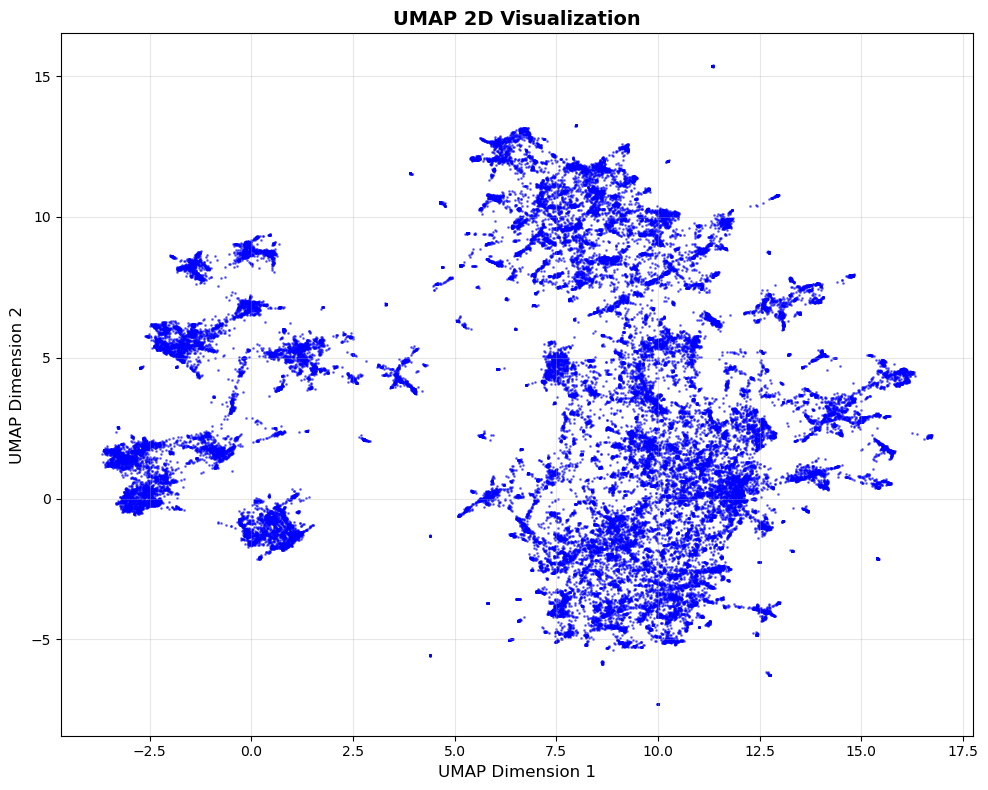

In [15]:
# Create scatter plots
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

# Plot UMAP 2D visualization
axes.scatter(embeddings_2d_umap[:, 0], embeddings_2d_umap[:, 1], 
                alpha=0.5, s=1, c='blue')
axes.set_title('UMAP 2D Visualization', fontsize=14, fontweight='bold')
axes.set_xlabel('UMAP Dimension 1', fontsize=12)
axes.set_ylabel('UMAP Dimension 2', fontsize=12)
axes.grid(True, alpha=0.3)

# Plot PCA 2D visualization
# axes[1].scatter(embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1], 
#                 alpha=0.5, s=1, c='red')
# axes[1].set_title('PCA 2D Visualization', fontsize=14, fontweight='bold')
# axes[1].set_xlabel(f'PC1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})', fontsize=12)
# axes[1].set_ylabel(f'PC2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})', fontsize=12)
# axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# print(f"Total explained variance by first 2 PCA components: {pca.explained_variance_ratio_.sum():.2%}")

